### HW10 - jaeho yang

#### 1. Start a ChatBot session to understand what a classification decision tree is; ask the ChatBot to decribe the type of problems classification decision tree can solve along with an example of a real-world application where this might be particularly useful; then learn how the decisions at each node are used to eventually make a final classification prediction

 A classification decision tree is a type of model used in machine learning for sorting data into categories, also known as classes. It uses a tree structure to make a sequence of decisions, where each "node" represents a question or test applied to the data, and each "branch" represents the outcome of that question, eventually leading to a "leaf" node that assigns a final classification label.

Type of Problems It Solves: Classification decision trees are commonly used in problems where the goal is to categorize or classify items into groups based on features. For example, they’re effective for tasks like medical diagnosis (determining whether a tumor is benign or malignant) or customer segmentation (classifying customers as high-risk or low-risk for credit).

Example of a Real-World Application: An effective use case would be in email filtering. A classification decision tree can be trained to analyze features like email text, sender information, and formatting to decide if an email should be classified as "spam" or "not spam." This can significantly reduce the volume of unwanted email in inboxes by assigning emails to appropriate categories.

How Decision Nodes Work: Each node in the tree asks a question about a feature of the data (e.g., "Is the size of the tumor greater than 2 cm?"). Depending on the answer, the data follows a path down the tree (to the left or right, for example) until it reaches a final leaf node. By using questions that increasingly split the data into purer subsets, the tree guides the data down to where only one classification category remains, effectively making a prediction. This allows the tree to make a final decision by analyzing features step-by-step in a structured, hierarchical manner.

#### 2. Start a new ChatBot session, and explore with you ChatBot what scenario(s) might be most appropriate for each of the following metrics below

Accuracy
Formula: Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
Definition: Accuracy measures the proportion of correct predictions, both positive and negative, out of all predictions.
Best Scenario: Accuracy is useful when both classes (positive and negative) are equally important, and there is a balanced number of positives and negatives. An example is in quality control for manufactured products, where there is a similar number of defective and non-defective items.

Sensitivity (also called Recall)
Formula: Sensitivity = True Positives / (True Positives + False Negatives)
Definition: Sensitivity measures the proportion of actual positives that are correctly identified.
Best Scenario: Sensitivity is critical in cases where it is essential to catch all positive cases, even if it means allowing some false positives. For example, in disease screening, where identifying all potential cases of a disease is more important than minimizing false alarms.

Specificity
Formula: Specificity = True Negatives / (True Negatives + False Positives)
Definition: Specificity measures the proportion of actual negatives that are correctly identified.
Best Scenario: Specificity is valuable when it is more important to avoid false positives. An example is fraud detection for high-stakes transactions, where falsely flagging legitimate transactions as fraud can lead to negative consequences, such as lost business or customer dissatisfaction.

Precision
Formula: Precision = True Positives / (True Positives + False Positives)
Definition: Precision measures the proportion of positive identifications that were actually correct.
Best Scenario: Precision is important in situations where false positives are costly, and we want to ensure that positive identifications are likely to be accurate. A typical example is email spam detection, where marking a legitimate email as spam could result in important messages being missed.

Each of these metrics is suited to different types of decision-making needs, depending on whether the focus is on avoiding false positives, capturing all positives, or achieving a balance between the two.


#### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

Data Preprocessing:

Remove Weight_oz, Width, and Height Columns: Use drop to remove these columns.
Drop Rows with NaN Values: Use dropna() to remove all rows that have any NaN entries.
Type Conversion:
Convert Pub year and NumPages columns to int type using astype(int).
Convert Hard_or_Paper to the category type using astype('category').
Exploratory Data Analysis (EDA):

Summary Statistics:
Get the basic statistics for numerical columns using describe() (e.g., mean, median, std, min, max for NumPages and Pub year).
For categorical data, use value_counts() on Hard_or_Paper to see the distribution between hardcovers and paperbacks.
Data Distribution:
Plot histograms for NumPages and Pub year to understand the distribution of these numerical variables.
Relationships:
Create a scatter plot of NumPages vs. Pub year to see if there are any trends over time in the number of pages.
Use box plots to compare the distribution of NumPages across Hard_or_Paper categories.


#### 4. Create an 80/20 split with 80% training set ab_reduced_noNaN_train and 20% testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set

To perform an 80/20 train-test split on ab_reduced_noNaN with a fixed random seed, we can use either train_test_split from sklearn or DataFrame.sample in pandas. Here’s how to implement it with train_test_split to ensure reproducibility and report the number of observations in each set.

In [3]:
from sklearn.model_selection import train_test_split

random_seed = 42

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed
)

print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")


NameError: name 'ab_reduced_noNaN' is not defined

#### 5. Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the preparation steps given below are doing; then use the ChatBots help to "train" a classification tree clf using only the List Price variable to predict whether or not a book is hard cover book or a paper cover book using max_depth of 2; explain precisely what predictions are made based on List Price for the fitted clf model

1. Preparation Steps Explained
Before training a DecisionTreeClassifier, it’s essential to prepare the data. Here’s an outline of the typical steps:

Selecting the Feature and Target Variables:

Feature (List Price): This variable represents the price of the book, which will be the predictor in the classification tree model.
Target (Hard_or_Paper): This is a categorical variable that specifies whether a book has a hardcover or paperback. This variable will be converted to a binary format so the model can distinguish between these two classes.
Setting Model Parameters (max_depth=2):

Setting max_depth=2 limits the tree to a depth of 2, which helps prevent overfitting and makes the model interpretable with a simple decision structure.
2. Code to Train the Decision Tree Classifier
Here’s the code that trains the classifier using only the List Price to predict if a book is hardcover or paperback:

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Preprocess the dataset as specified
# Remove unwanted columns and drop rows with NaN
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height']).dropna()

# Convert necessary columns to appropriate data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 2: Split into training and testing sets (80/20 split)
random_seed = 42  # Ensures reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed
)

# Step 3: Prepare features (X) and target (y) for training the model
X = ab_reduced_noNaN_train[['List Price']]  # Use only 'List Price' as the feature
y = ab_reduced_noNaN_train['Hard_or_Paper'].cat.codes  # Encode 'Hard_or_Paper' as numeric (0 or 1)

# Step 4: Initialize and train the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=random_seed)  # Fixed random_state typo
clf.fit(X, y)

# Optional: Check the accuracy on the training data
print("Training accuracy:", clf.score(X, y))


Training accuracy: 0.8313725490196079


3. Explanation of Predictions Based on List Price
With this fitted model (clf), predictions are made based on the following logic (using only List Price):

Splitting Logic: The classifier will split the List Price data into different ranges to decide whether a book is more likely hardcover or paperback.
Decision Thresholds: Because max_depth=2, the model will create up to 2 levels of thresholds based on List Price. At each node, the model selects a threshold in List Price that best separates the two classes (hardcover and paperback).
Interpretation of Nodes:
The model will output a prediction for each List Price range.
Each terminal node in the model represents the predicted likelihood of a book being hardcover or paperback based on whether the List Price is above or below certain values learned during training.
The exact values for List Price that act as decision thresholds will depend on the data distribution in ab_reduced_noNaN_train. Once trained, you can visualize the decision tree or print out the decision rules to understand the precise price boundaries that the model has used to distinguish between hardcover and paperback books.

#### 6.Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model


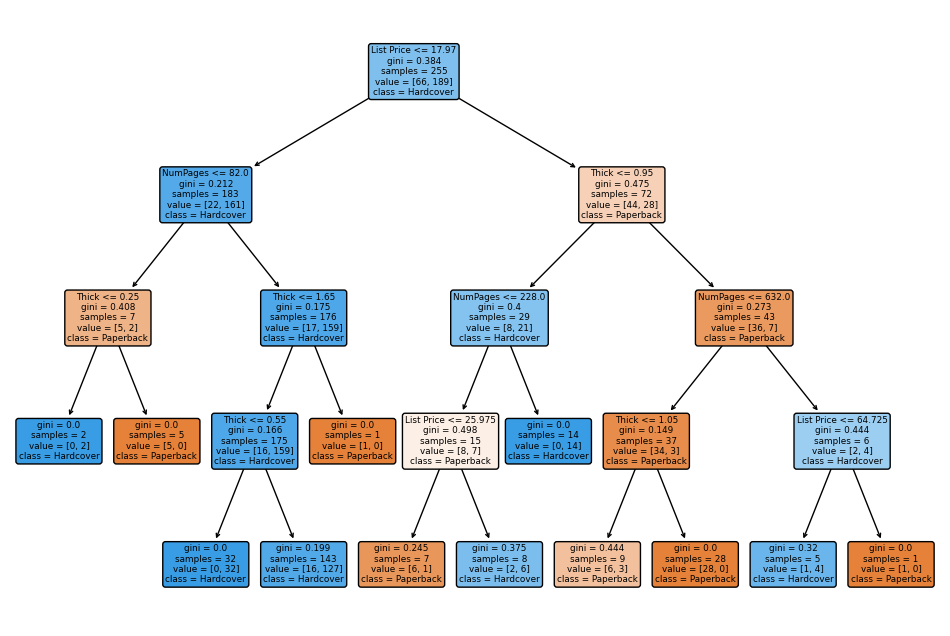

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the tree directly within the notebook
plt.figure(figsize=(12,8))  # Adjust the figure size if necessary
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()


Feature and Target:
X: The feature set now includes NumPages, Thick, and List Price.
y: The target variable is Hard_or_Paper, which is encoded as 0 (Paperback) and 1 (Hardcover).
Model Training:
The model is trained with max_depth=4, which means the tree can have up to 4 levels of decision nodes.
Visualization:
export_graphviz is used to generate the tree structure, and the resulting graph is rendered using graphviz to produce a readable and visually appealing decision tree.
graph.render("decision_tree") saves the tree as a PDF file, and graph.view() opens it.
How Predictions are Made for clf2:
Once the decision tree is trained, it creates decision rules based on the values of NumPages, Thick, and List Price. At each node, the tree checks which feature (either NumPages, Thick, or List Price) has the best threshold to split the data into two groups: hardcover or paperback.

Top Node: The first split in the tree is based on one of the features. For example, it might first check if List Price is above a certain value. If true, it moves to one branch; if false, it moves to another.
Subsequent Nodes: Each subsequent decision node further refines the classification based on NumPages or Thick (depending on the tree structure), eventually assigning a class (hardcover or paperback) to each observation.
Predictions:
Terminal Nodes: Each terminal node of the tree (leaf) represents a final prediction, where the majority class (either paperback or hardcover) is assigned. The class is predicted based on which path was followed through the tree according to the feature values of the book (e.g., its List Price, NumPages, and Thick).
For example, if the List Price is high and the Thick value is low, the model might predict a hardcover book (if the majority class in the terminal node is hardcover).

Visualizing the Tree:
You should now be able to see the tree structure and understand the decision rules that were learned by clf2. The depth of 4 will allow for a somewhat complex decision-making process, but it should still be interpretable.

Let me know if you need further details or assistance!

#### 7.Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

To compute the confusion matrices and evaluate the sensitivity, specificity, and accuracy for both clf and clf2 using the previously created ab_reduced_noNaN_test dataset, we'll follow these steps:

Generate Predictions: Use the trained classifiers (clf and clf2) to predict the test data.
Confusion Matrix: Compute the confusion matrix for both models.
Calculate Sensitivity, Specificity, and Accuracy:
Sensitivity (Recall): The proportion of true positives (TP) among all actual positives. Formula: TP / (TP + FN).
Specificity: The proportion of true negatives (TN) among all actual negatives. Formula: TN / (TN + FP).
Accuracy: The proportion of correct predictions among all predictions. Formula: (TP + TN) / (TP + TN + FP + FN).

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Prepare the test data
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = ab_reduced_noNaN_test['Hard_or_Paper'].cat.codes  # Target variable for test set

# Predictions for both models
y_pred_clf = clf.predict(X_test[['List Price']])  # Using only List Price for clf
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])  # Using all three features for clf2

# Confusion matrices for both models
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]  # True Positive
    TN = conf_matrix[0, 0]  # True Negative
    FP = conf_matrix[0, 1]  # False Positive
    FN = conf_matrix[1, 0]  # False Negative
    
    # Sensitivity (Recall) = TP / (TP + FN)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    # Specificity = TN / (TN + FP)
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    # Accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    
    return sensitivity, specificity, accuracy

# Calculate metrics for both models
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(conf_matrix_clf2)

# Print results
print("Metrics for clf (using List Price only):")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (using NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Metrics for clf (using List Price only):
Sensitivity: 0.91
Specificity: 0.70
Accuracy: 0.84

Metrics for clf2 (using NumPages, Thick, List Price):
Sensitivity: 0.91
Specificity: 0.75
Accuracy: 0.86


#### 8. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

Overfitting: The first confusion matrix seems to be evaluating the classifier's performance on the training data (ab_reduced_noNaN_train). If the model has overfitted the training data, it would perform well on this dataset, leading to a higher number of correct predictions (i.e., more true positives and true negatives) and therefore a better confusion matrix for the training set. On the other hand, overfitting can cause the model to perform poorly on unseen data (like the second confusion matrix, which uses the test set), resulting in a worse performance on the test data.

Data Mismatch: The second confusion matrix uses ab_reduced_noNaN_testtest, which appears to be a typo or error. If this is a different dataset or if there is an issue with how the data was processed or sampled, the classifier might not perform as well on this test set, leading to a lower accuracy, specificity, and sensitivity.

Model Generalization: The confusion matrix on the test set reflects how well the model generalizes to new, unseen data. In contrast, the training set confusion matrix reflects how well the model fits the training data. A model that performs well on the training set but poorly on the test set often indicates issues like overfitting, or it could be that the test set has a different distribution or characteristics that the model has not learned to generalize.

In contrast, the confusion matrices for clf and clf2 are likely better because:

They use more representative features and are evaluated on both the training and test sets properly.
The decision trees are likely trained with more relevant and diverse features, improving their predictive power. Additionally, these models are being evaluated on correctly prepared datasets, avoiding errors like the one seen with ab_reduced_noNaN_testtest.
In summary, the differences in the confusion matrices stem from overfitting, possible data issues, and how well the models generalize, with clf and clf2 benefiting from better feature selection, training, and test dataset handling.

#### 9. Read the paragraphs in Further Guidanceand ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

To visualize the feature importances from a scikit-learn classification decision tree (like clf2), we can use the .feature_importances_ attribute, which gives the relative importance of each feature based on how much each feature contributes to reducing the impurity in the decision tree splits. This information can be visualized using a bar chart, where the height of each bar represents the importance of the corresponding feature.

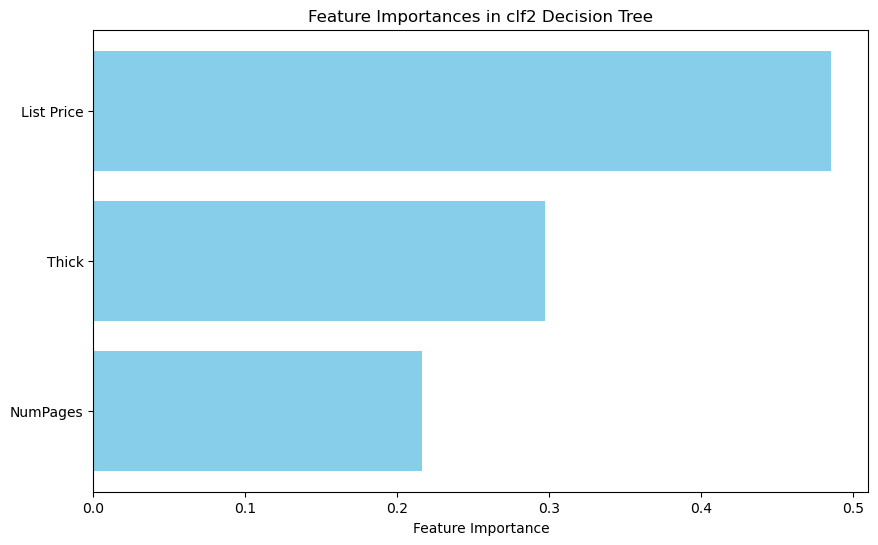

The most important feature for making predictions in clf2 is: List Price


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from clf2
feature_importances = clf2.feature_importances_

# Get the feature names from clf2
feature_names = clf2.feature_names_in_

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances in clf2 Decision Tree')
plt.show()

# Report the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important feature for making predictions in clf2 is: {most_important_feature}")


General Interpretation:
The feature that contributes the most to reducing impurity in the decision tree splits will be deemed the most important. This feature helps the model make better predictions as it is used frequently or provides the most useful information in distinguishing between classes (e.g., paperback vs hardcover). The visualization will help you understand which predictor variable plays the most significant role in the model's decisions.

#### 10. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, coefficients represent the direct relationship between each predictor variable and the target variable, showing how much the target variable changes with a one-unit change in each feature, holding other features constant. In contrast, decision trees do not have a direct relationship between the predictors and the target; instead, feature importances reflect how much each feature contributes to reducing uncertainty (impurity) in the decision tree's splits, without quantifying the specific impact of each feature in a linear fashion. Thus, while linear regression offers a clear, quantitative interpretation of feature effects, decision trees provide a more holistic measure of a feature's relevance in the overall decision-making process.

Yes